In [1]:
import numpy as np
import scipy.stats as sp
import pandas as pd
import matplotlib.pyplot as plt
SEED = 999
np.random.seed(SEED)

## 5. Inventory Policies

In [2]:
time = 200
d_mu = 100
d_std = 25
d = np.maximum(np.random.normal(d_mu, d_std, time).round(0).astype(int), 0)

In [3]:
L, R, alpha = 4, 1, 0.95
z = sp.norm.ppf(alpha)
x_std = np.sqrt(L+R)*d_std
Ss = np.round(x_std*z).astype(int)
Cs = 1/2 * d_mu * R
Is = d_mu * L
S = Ss + 2*Cs + Is

In [4]:
hand = np.zeros(time, dtype=int)
transit = np.zeros((time, L+1), dtype=int)

In [5]:
hand[0] = S - d[0]
transit[1,-1] = d[0]

In [6]:
stock_out_period = np.full(time, False, dtype=bool)
stock_out_cycle = []


In [7]:
for t in range(1, time):
    if transit[t-1, 0]>0:
        stock_out_cycle.append(stock_out_period[t-1])
    hand[t] = hand[t-1] - d[t] + transit[t-1, 0]
    stock_out_period[t] = hand[t] < 0
    
    transit[t, :-1] = transit[t-1, 1:]
    if 0==t%R:
        net = hand[t] + transit[t].sum()
        transit[t,L] = S - net

     Demand  On-hand                 In-transit
5        84      -10     [135, 211, 79, 93, 84]
6       139      -14     [211, 79, 93, 84, 139]
7        48      149      [79, 93, 84, 139, 48]
8       136       92     [93, 84, 139, 48, 136]
9       124       61    [84, 139, 48, 136, 124]
..      ...      ...                        ...
195     114       80   [107, 119, 52, 120, 114]
196     107       80   [119, 52, 120, 114, 107]
197     100       99   [52, 120, 114, 107, 100]
198     122       29  [120, 114, 107, 100, 122]
199      94       55   [114, 107, 100, 122, 94]

[195 rows x 3 columns]


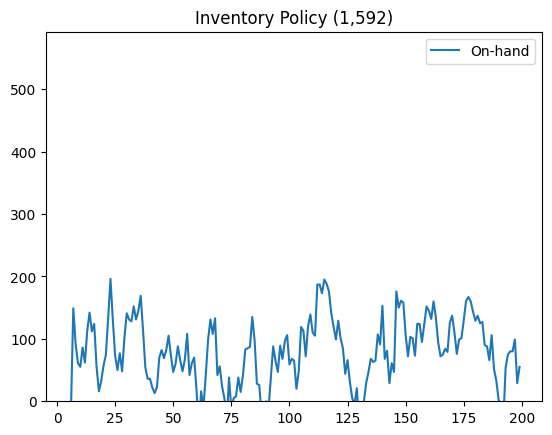

In [8]:
df = pd.DataFrame(data={'Demand':d, 'On-hand':hand, 'In-transit':list(transit)})
df = df.iloc[R+L:, :]
print(df)
df['On-hand'].plot(title='Inventory Policy (%d,%d)' %(R,S), ylim=(0,S), legend=True)
plt.show()

In [9]:
print('Alpha:',alpha*100)
SL_alpha = 1-sum(stock_out_cycle)/len(stock_out_cycle)
print('Cycle Service Level:',round(SL_alpha*100,1))
SL_period = 1-sum(stock_out_period)/time
print('Period Servie Level:', round(SL_period*100,1))

Alpha: 95.0
Cycle Service Level: 92.3
Period Servie Level: 92.5
